# DATA SET INFORMATION

This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.

# DATA SET

https://www.kaggle.com/benroshan/factors-affecting-campus-placement

# PROBLEM STATEMENT

* It is important for a university to give placements to the students. The major factors which is influencing placement is very important for a university to train according to that. This Data set provides us the information about the acedamic details of student. From the given academic detail "The Problem Statement is to Predict the Status of the student in terms of placement wheather the student got placed through campus or not?

* This is Binary Classification Problem beacuse there are two labels in our target variable saying wheather student got placed or not.

* After Building a model, The main was to focus on the factors that are influencing placement the most. From that ,It will be easy for University to train students accordingly.

# IMPORT LIBARIES 

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
sns.set_palette("Set3")
from prettytable import PrettyTable
from scipy import stats
import scipy
from sklearn.model_selection import train_test_split

# DATA UNDERSTANDING

In [6]:
df=pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


##### * There are 215 rows and 15 columns

In [7]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [9]:
categorical=df.select_dtypes(object)
print("Object Features:")
print(categorical.columns)
print("Continous Features:")
continous=df.select_dtypes(np.number)
print(continous.columns)

Object Features:
Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')
Continous Features:
Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')


# VARIABLE ANALYSIS

In [14]:
continous.drop("sl_no",axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


<AxesSubplot:xlabel='mean'>

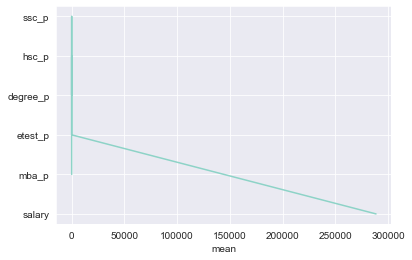

In [18]:
sns.lineplot(continous.drop("sl_no",axis=1).describe().T["mean"],continous.drop("sl_no",axis=1).columns)

##### * The Numerical Column Salary is in huge different Scale

In [19]:
categorical.describe().T

,count,unique,top,freq
gender,215,2,M,139
ssc_b,215,2,Central,116
hsc_b,215,2,Others,131
hsc_s,215,3,Commerce,113
degree_t,215,3,Comm&Mgmt,145
workex,215,2,No,141
specialisation,215,2,Mkt&Fin,120
status,215,2,Placed,148


##### *There ia not that much of huge caegories in categorical variable. No feature engineering required.

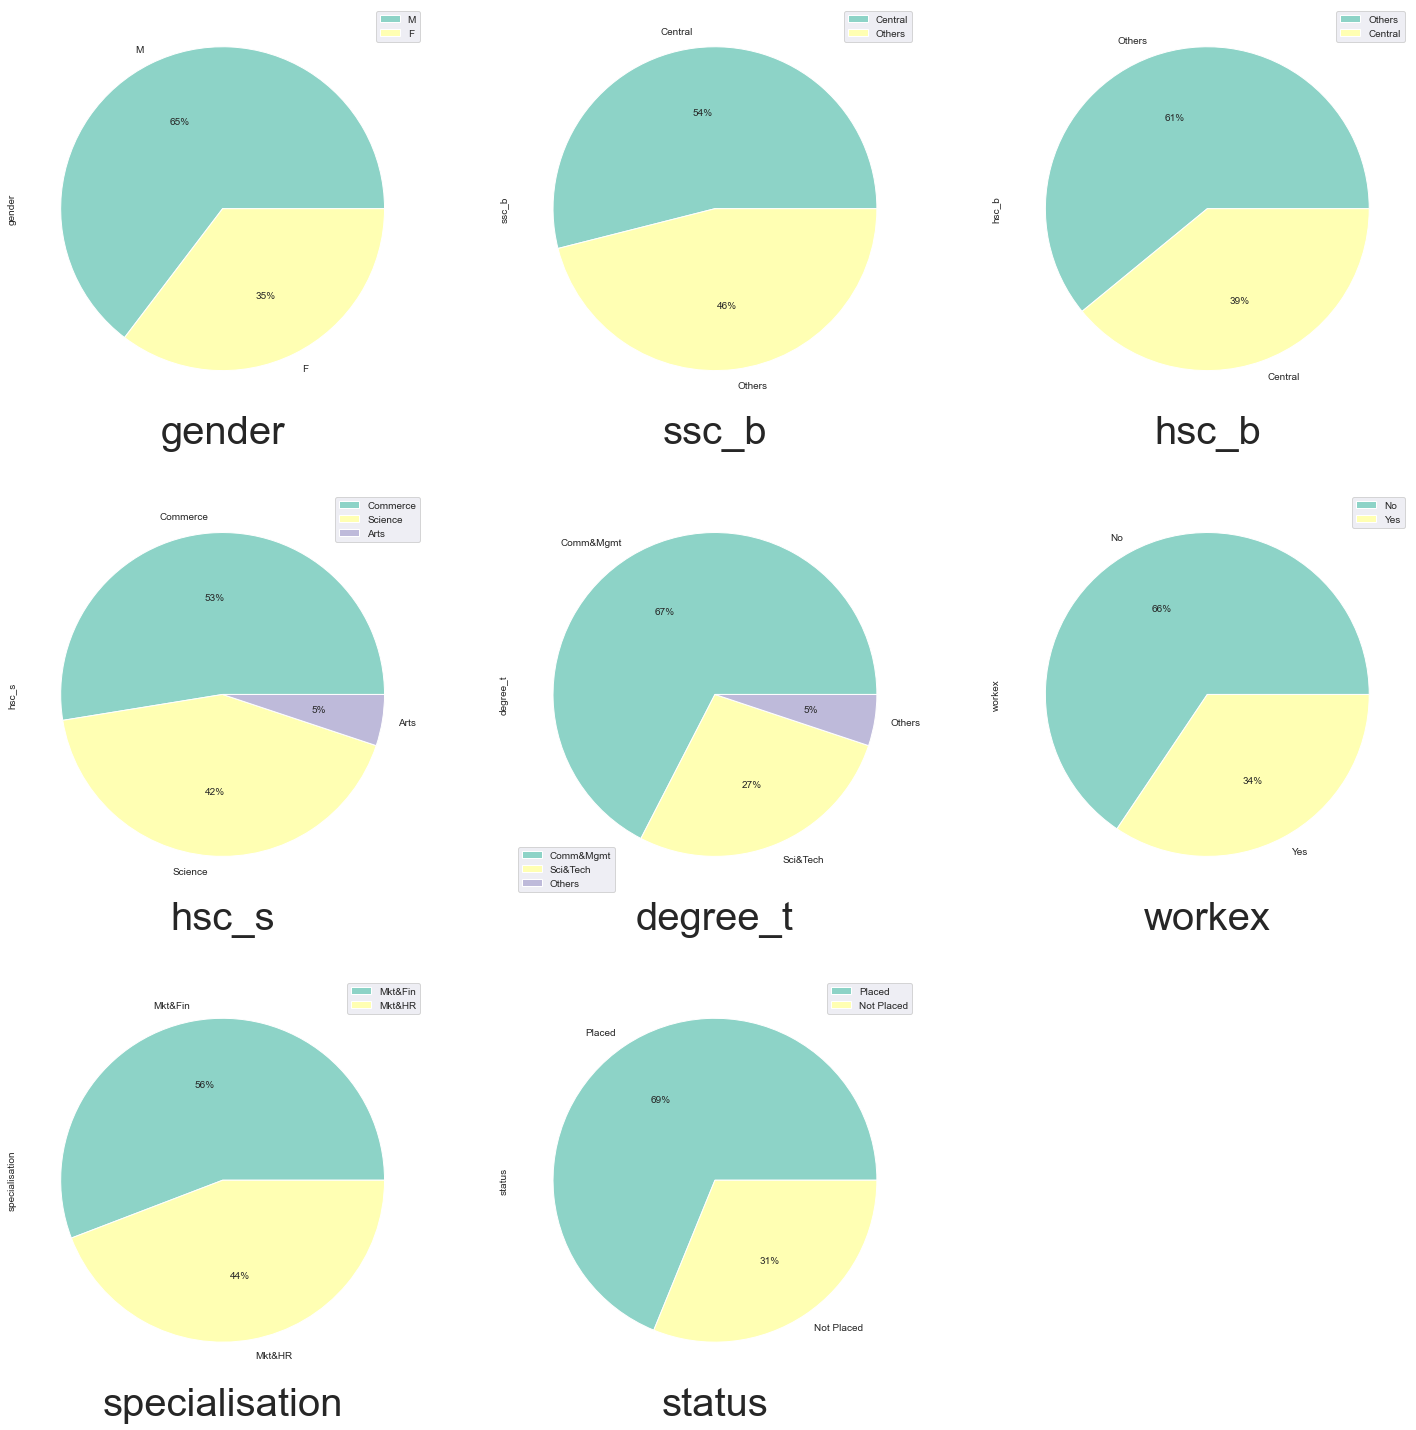

In [28]:
#c
x = 8 # number of rows
y = 3 # number of columns
z = 1 # initialize plot counter
fig = plt.figure(figsize=(25, 70))
for i in df.select_dtypes(object).columns:
 plt.subplot(x, y, z)
 plt.xlabel(i)
 df[i].value_counts().plot(kind = 'pie', autopct = '%0.0f%%')
 plt.xlabel(i,size=40)
 plt.legend()
 plt.xticks(rotation=90)
 z = z + 1
plt.show()

##### *All columns having not more than 3 categories, so its enough to go without feature engineering

In [42]:
t = PrettyTable(['Column Name', 'P Values', 'Interpretation'])
for col in df.select_dtypes(np.object).drop('status', axis=1) :
    tab = pd.crosstab(df[col],df['status'],margins = False)
    stat, p, dof, expected = scipy.stats.chi2_contingency(tab)
    if p<0.05:
        cm = 'Significant'
    else:
        cm = 'Not Significant'
    t.add_row([col,p,cm ])
print(t)

+----------------+------------------------+-----------------+
|  Column Name   |        P Values        |  Interpretation |
+----------------+------------------------+-----------------+
|     gender     |  0.23980260881037566   | Not Significant |
|     ssc_b      |   0.6897729431530739   | Not Significant |
|     hsc_b      |    0.9222837052885     | Not Significant |
|     hsc_s      |   0.5727118511343621   | Not Significant |
|    degree_t    |  0.22661076190356658   | Not Significant |
|     workex     | 9.906584720516494e-05  |   Significant   |
| specialisation | 0.00042018425858864284 |   Significant   |
+----------------+------------------------+-----------------+


In [44]:
df.isnull().sum()/len(df)* 100

sl_no              0.000000
gender             0.000000
ssc_p              0.000000
ssc_b              0.000000
hsc_p              0.000000
hsc_b              0.000000
hsc_s              0.000000
degree_p           0.000000
degree_t           0.000000
workex             0.000000
etest_p            0.000000
specialisation     0.000000
mba_p              0.000000
status             0.000000
salary            31.162791
dtype: float64

<AxesSubplot:>

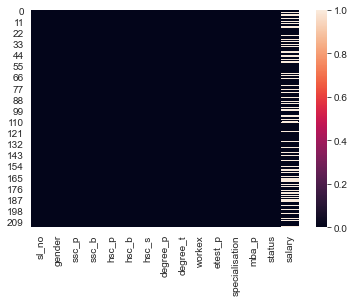

In [45]:
sns.heatmap(df.isnull())

##### *The column Salary is having 31 percent of missing values

In [46]:
df.drop("salary",axis=1,inplace=True)

In [53]:
df.drop("sl_no",axis=1,inplace=True)

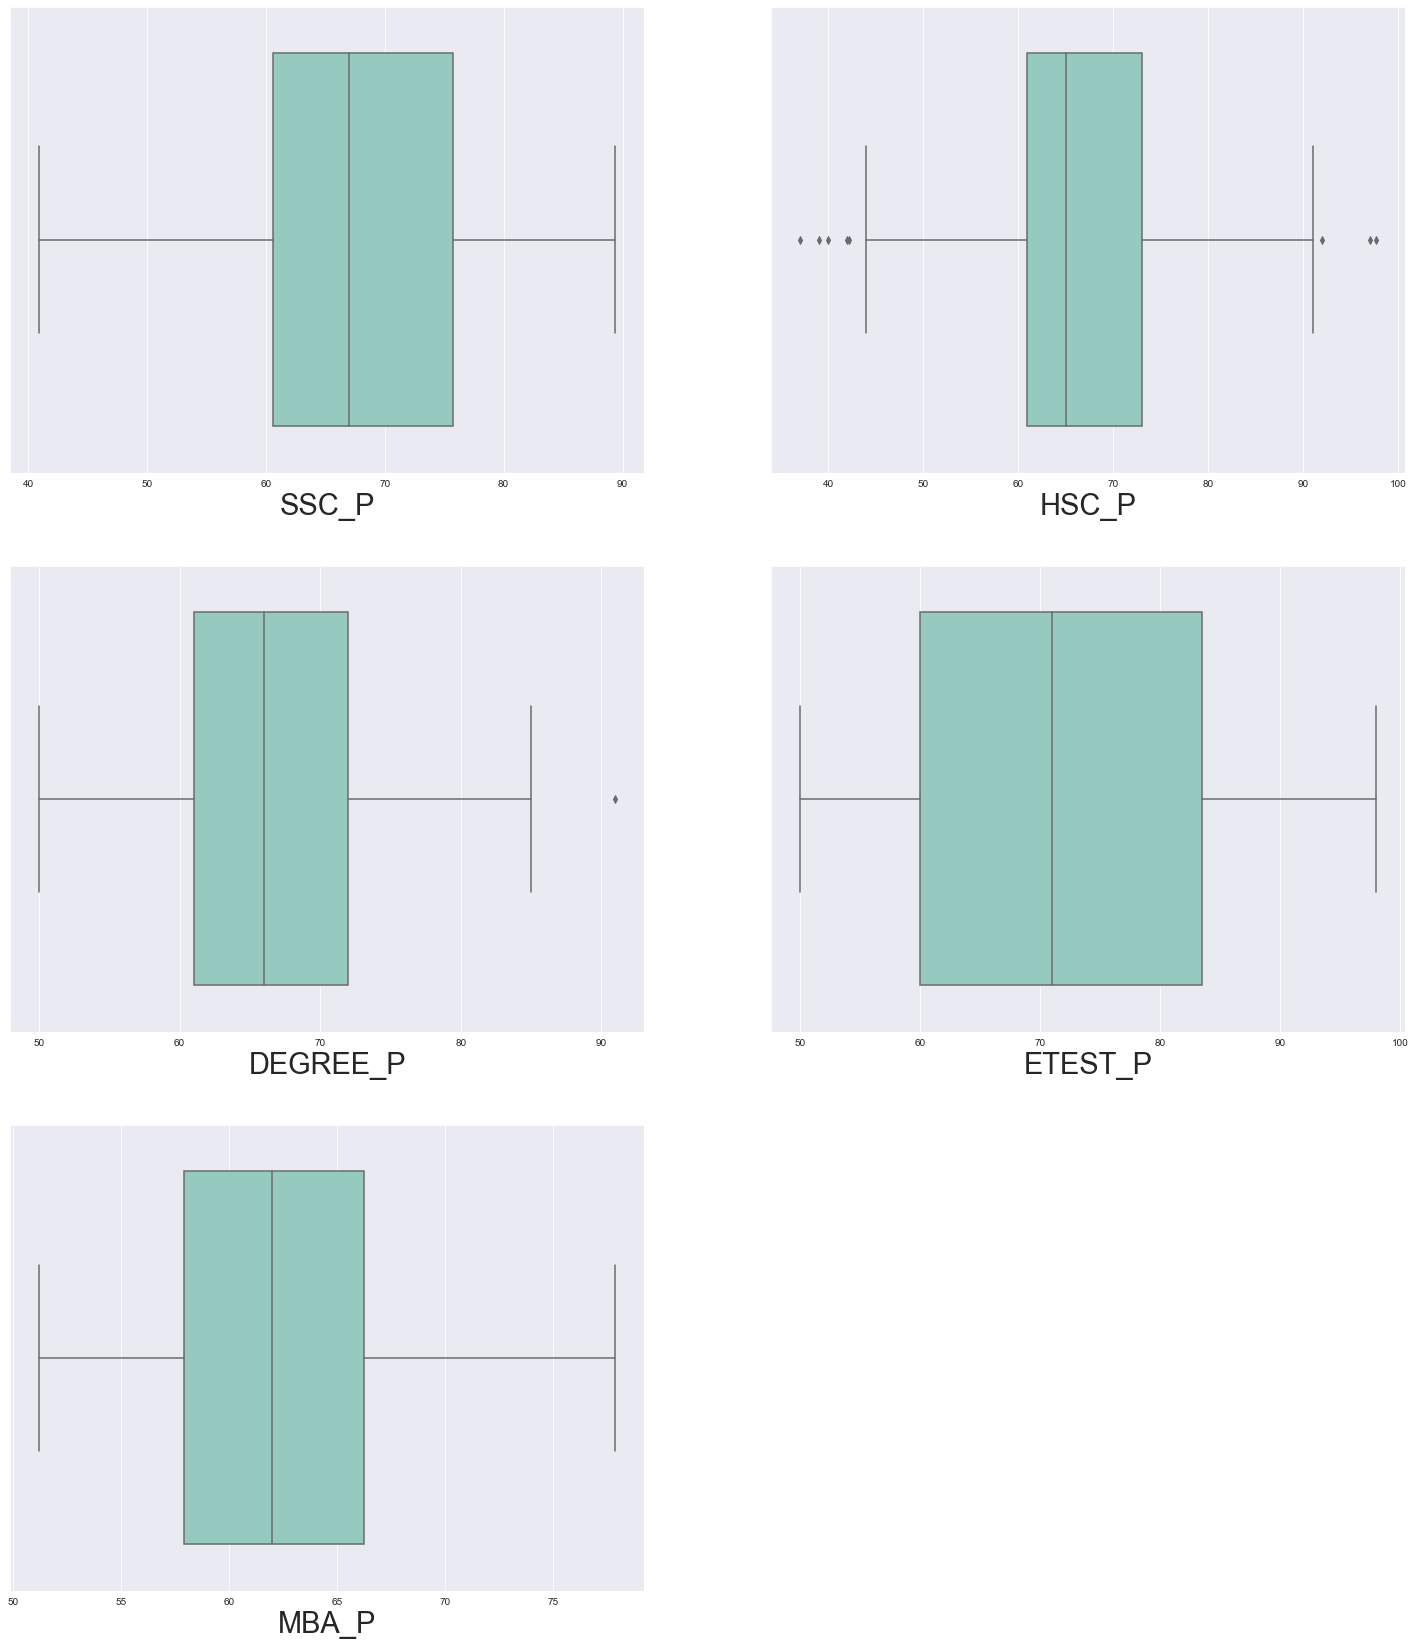

In [48]:
x=6
y=2
z=1
fig=plt.figure(figsize=(25,60))
for i in continous.drop(["sl_no","salary"],axis=1).columns:
    plt.subplot(x,y,z)
    
    sns.boxplot(df[i])
    plt.xlabel(i.upper(),size=29)
    z=z+1
plt.show()

##### * all continous feautures are in same scale and near to normal.

In [49]:
df1 = df[df['status']=='Placed']
df2 = df[df['status']=='Not Placed']
t = PrettyTable(['Column Name', 'P Values', 'Interpretation'])
for col in df.select_dtypes(np.number).drop("sl_no", axis=1) :
    rho , pval = stats.kruskal(df1[col],df2[col])
    if pval<0.05:
        cm = 'Significant'
    else:
        cm = 'Not Significant'
    t.add_row([col,pval,cm ])
print(t)

+-------------+------------------------+-----------------+
| Column Name |        P Values        |  Interpretation |
+-------------+------------------------+-----------------+
|    ssc_p    | 1.6751463798396454e-18 |   Significant   |
|    hsc_p    | 1.1865333364186911e-11 |   Significant   |
|   degree_p  | 4.2650477536563365e-13 |   Significant   |
|   etest_p   |  0.09531059978063809   | Not Significant |
|    mba_p    |  0.35409377071336057   | Not Significant |
+-------------+------------------------+-----------------+


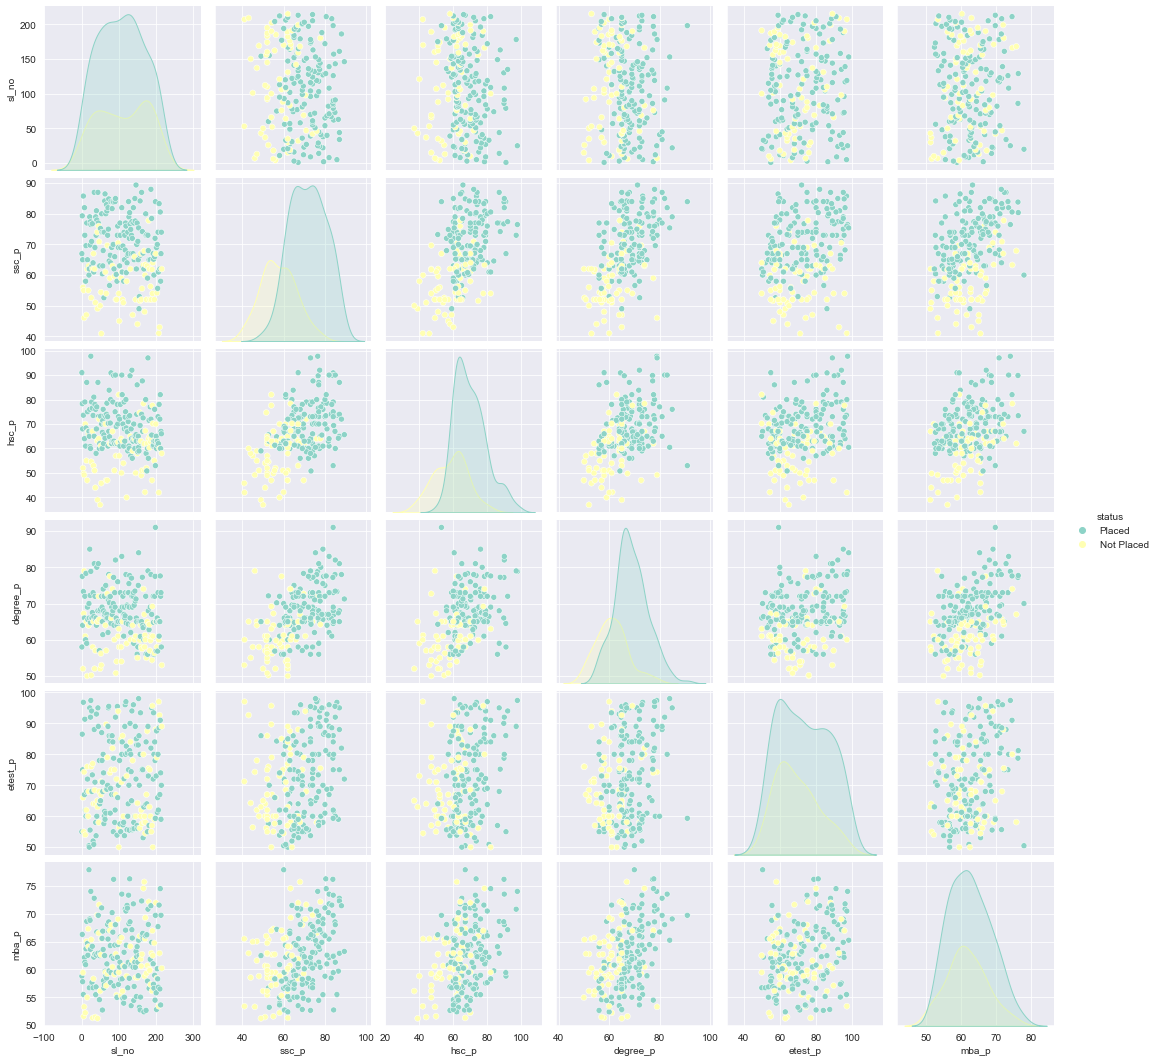

In [50]:
sns.pairplot(df,hue="status")

##### * All variables are corelated with the target

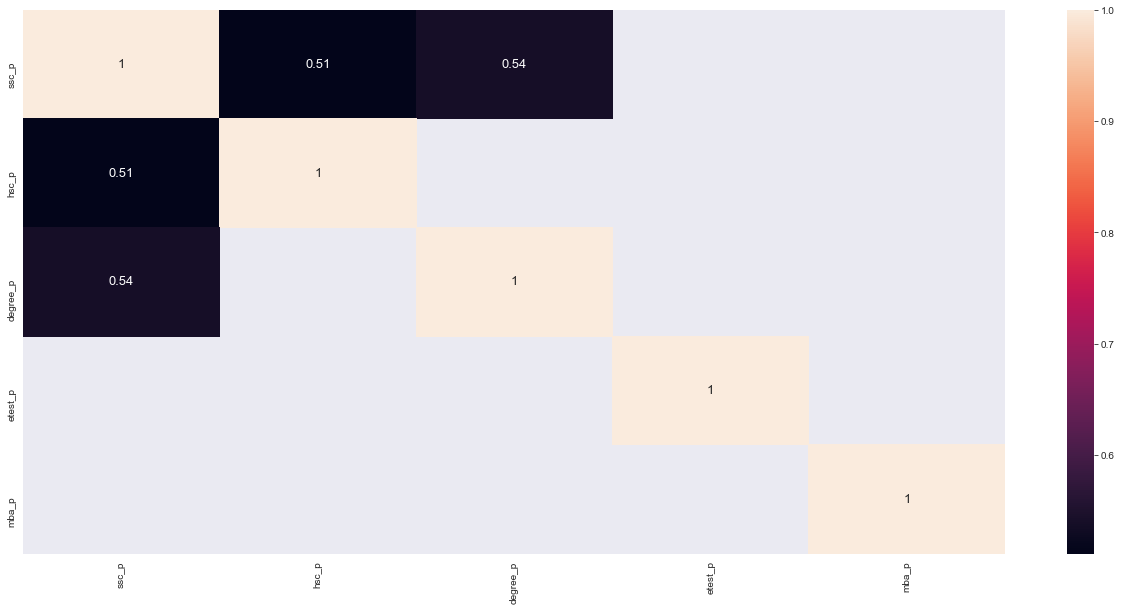

In [52]:
plt.figure(figsize=(22,10))
sns.heatmap(df.drop("sl_no",axis=1).corr()[np.abs(df.corr()) >0.5],annot=True,annot_kws={"size":13})
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

##### *The variables are inter corelated in some way

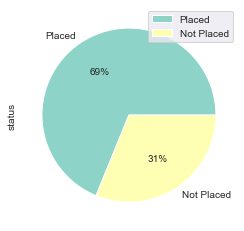

In [56]:
df.status.value_counts().plot(kind="pie",autopct="%0.0f%%")
plt.legend()

#### As we can see there is much of class imbalance, so at the time model fine tuning we will include SMOTE .

In [57]:
df.std()

ssc_p       10.827205
hsc_p       10.897509
degree_p     7.358743
etest_p     13.275956
mba_p        5.833385
dtype: float64

##### *All varaibles are explaning much of varaince so all are important. If any variables which is not contributing for the target we can remove at the ime of model fine tuning.

In [59]:
df_feature=df.drop("status",axis=1)
df_target=df.status
df_cat=df_feature.select_dtypes(object)
df_num=df_feature.select_dtypes(np.number)
dummies=pd.get_dummies(df_cat,drop_first=True)
df_final=pd.concat([df_num,dummies],axis=1)
df_final.head(1)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.0,91.0,58.0,55.0,58.8,1,1,1,1,0,0,1,0,1


In [60]:
df_target.replace("Placed",1,inplace=True)
df_target.replace("Not Placed",0,inplace=True)

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(df_final,df_target,test_size=0.3,random_state=10)

In [62]:
from scipy import stats
var=0
for i in range(14):
    if stats.ttest_ind(xtrain.iloc[:,i],xtest.iloc[:,i])[1]<0.5:
        var=var+1
        print("there is strong varaition ",xtrain.columns[i])
if var==0:
    print(" both train and test have simliar data")

there is strong varaition  ssc_p
there is strong varaition  degree_p
there is strong varaition  gender_M
there is strong varaition  hsc_b_Others
there is strong varaition  hsc_s_Commerce
there is strong varaition  hsc_s_Science
there is strong varaition  degree_t_Others
there is strong varaition  degree_t_Sci&Tech


# MODEL BULDING

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt_base=DecisionTreeClassifier()
dt_base.fit(xtrain,ytrain)

y_train_pred_dt=dt_base.predict(xtrain)
y_test_pred_dt=dt_base.predict(xtest)

In [66]:
from sklearn.metrics import classification_report
print("TRAIN REPORT ")
print(classification_report(ytrain,y_train_pred_dt))
print("TEST REPORT")
print(classification_report(ytest,y_test_pred_dt))

TRAIN REPORT 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       106

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

TEST REPORT
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.81      0.83      0.82        42

    accuracy                           0.77        65
   macro avg       0.75      0.74      0.75        65
weighted avg       0.77      0.77      0.77        65



In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_base=RandomForestClassifier(random_state=10)
rf_base_model=rf_base.fit(xtrain,ytrain)

y_train_pred_rf=rf_base_model.predict(xtrain)
y_test_pred_rf=rf_base_model.predict(xtest)

In [68]:
print("TRAIN REPORT ")
print(classification_report(ytrain,y_train_pred_rf))
print("TEST REPORT")
print(classification_report(ytest,y_test_pred_rf))

TRAIN REPORT 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       106

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        23
           1       0.82      1.00      0.90        42

    accuracy                           0.86        65
   macro avg       0.91      0.80      0.83        65
weighted avg       0.89      0.86      0.85        65



##### *1. From the classification Report we can say clearly that the model is over fitted.
##### *2. The test accuracy precesion are very very low.
##### *3. Both decesion tree and random forest are not performing well
##### *4. Data is imbalance so we can't consider accuracy, we have to consider F1score.

In [71]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

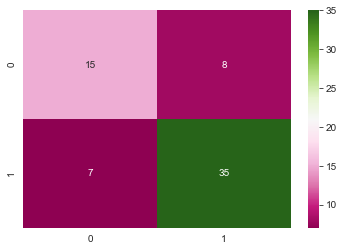

In [74]:
sns.heatmap(confusion_matrix(ytest,y_test_pred_dt),annot=True,cmap="PiYG")

<AxesSubplot:>

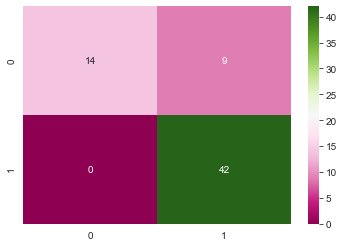

In [75]:
sns.heatmap(confusion_matrix(ytest,y_test_pred_rf),annot=True,cmap="PiYG")

# MODEL FINE TUNING

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
tuned_parameters=[ {"criterion":["entropy","gini"],"max_depth":[10,15,20],"n_estimators":[10,20,30,50,70,90],
                    'max_features':["sqrt","log2"],
                   "min_samples_leaf":[1,5,9],
                    "max_leaf_nodes":[2,5,8,9]}]
rf=RandomForestClassifier(random_state=10)
rf_grid=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
rf_grid_model=rf_grid.fit(xtrain,ytrain)
print("best parameters on Random Forest",rf_grid_model.best_params_)

best parameters on Random Forest {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 5, 'n_estimators': 10}


In [78]:
rf_tunned=RandomForestClassifier(random_state=10,criterion="gini",max_depth=10,max_features="sqrt",max_leaf_nodes=8,min_samples_leaf=5,n_estimators=10                      )
rf_tunned_model=rf_tunned.fit(xtrain,ytrain)

In [79]:
y_train_pred_rf_tunned=rf_tunned_model.predict(xtrain)
y_test_pred_rf_tunned=rf_tunned_model.predict(xtest)

In [80]:
print("TRAIN REPORT ")
print(classification_report(ytrain,y_train_pred_rf_tunned))
print("TEST REPORT")
print(classification_report(ytest,y_test_pred_rf_tunned))

TRAIN REPORT 
              precision    recall  f1-score   support

           0       1.00      0.66      0.79        44
           1       0.88      1.00      0.93       106

    accuracy                           0.90       150
   macro avg       0.94      0.83      0.86       150
weighted avg       0.91      0.90      0.89       150

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.52      0.69        23
           1       0.79      1.00      0.88        42

    accuracy                           0.83        65
   macro avg       0.90      0.76      0.78        65
weighted avg       0.87      0.83      0.81        65



 # SMOTE

In [81]:
from imblearn.over_sampling import SMOTE

In [86]:
smote = SMOTE(sampling_strategy=0.7)
x_sm,y_sm = smote.fit_resample(df_final,df_target)

In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.3,random_state=10)

In [89]:
rf_tunned=RandomForestClassifier(random_state=10,criterion="gini",max_depth=10,max_features="sqrt",max_leaf_nodes=8,min_samples_leaf=5,n_estimators=10                      )
rf_tunned_model=rf_tunned.fit(xtrain,ytrain)

In [90]:
y_train_pred_rf_tunned=rf_tunned_model.predict(xtrain)
y_test_pred_rf_tunned=rf_tunned_model.predict(xtest)

In [91]:
print("TRAIN REPORT ")
print(classification_report(ytrain,y_train_pred_rf_tunned))
print("TEST REPORT")
print(classification_report(ytest,y_test_pred_rf_tunned))

TRAIN REPORT 
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        72
           1       0.90      0.95      0.92       103

    accuracy                           0.91       175
   macro avg       0.91      0.90      0.90       175
weighted avg       0.91      0.91      0.91       175

TEST REPORT
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        31
           1       0.87      0.76      0.81        45

    accuracy                           0.79        76
   macro avg       0.79      0.80      0.79        76
weighted avg       0.80      0.79      0.79        76



In [92]:
iff=pd.DataFrame({"features": xtrain.columns,"importance level ": rf_tunned_model.feature_importances_})

In [93]:
iff=iff.sort_values("importance level ",ascending=False)

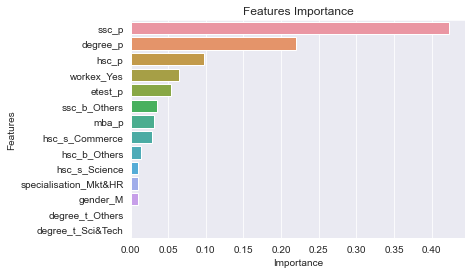

In [94]:
sns.barplot(iff["importance level "],iff["features"])
plt.title("Features Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

1. ssc_p
2. degree_p
3. hsc_p
4. mba_p
5. Specialization

##### * The above 5 variables are highly  contributing to the target

In [96]:
a1=df[["ssc_p","hsc_p","degree_p","mba_p","specialisation","status"]]

df_target=a1.status

df_target=a1.status

num=a1.select_dtypes(np.number)

cat=a1.select_dtypes(object)

In [97]:
dummies=pd.get_dummies(cat,drop_first=True)

df_d1=pd.concat([num,dummies],axis=1)

df_d1.head(2)

,ssc_p,hsc_p,degree_p,mba_p,status,specialisation_Mkt&HR
0,67.00,91.00,58.00,58.80,1,1
1,79.33,78.33,77.48,66.28,1,0


In [98]:
xtrain,xtest,ytrain,ytest=train_test_split(df_d1,df_target,test_size=0.3,random_state=10)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(150, 6)
(65, 6)
(150,)
(65,)


In [99]:
rf_tunned_imp=RandomForestClassifier(random_state=10,criterion="gini",max_depth=10,max_features="sqrt",max_leaf_nodes=8,min_samples_leaf=5,n_estimators=10                      )
rf_tunned_model_imp=rf_tunned.fit(xtrain,ytrain)

y_train_pred_rf_imp=rf_tunned_model_imp.predict(xtrain)
y_test_pred_rf_imp=rf_tunned_model_imp.predict(xtest)

print(classification_report(ytest,y_test_pred_rf_imp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        42

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



<AxesSubplot:>

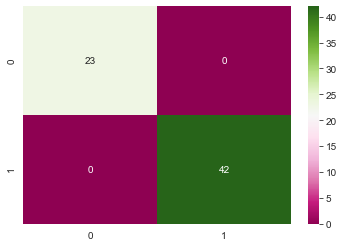

In [100]:
sns.heatmap(confusion_matrix(ytest,y_test_pred_rf_imp),annot=True,cmap="PiYG")

# MODEL VALIDATION

1. From the hyper parameter tuning, I can't able to get more accuracy. After gettting the importance features which is affeting target the most,and I used tunned parameter .
2. The model is giving 100% accuracy in both train and test data in Random forest after considering importance features.
3. Hence interms of buisness we can conclude that the percentage is more important for getting job. 

In [101]:
accuracy_table_test=pd.DataFrame({"Model_Level":["random_forest_base","random_forest_tunned","random_forest_imp_features"],"Accuracy in %":[86,83,100]})

accuracy_table_test.set_index("Model_Level")

,Accuracy in %
Model_Level,
random_forest_base,86
random_forest_tunned,83
random_forest_imp_features,100


1. First find best parameter in Random Forest using hyper Parameter Tuning.
2. Fit a model using parameter and find  5 best features
3. Using the fined tunned parameter and 5 best features, again rebuild the model to get 100 % percent accuracy of predicting wheather the student is placed or not.

# EMPLOYBLITY FACTORS

1. Percentage of degree in both hsc,ssc and pg are important to get placed
2. Specialization of the cource studied is important.
3. Students of other domains other than MBA have to be train well to get placement.
4. All the internal and external marks are important to get place.